# Multivariate Data analysis

## 1. Exercise dataset

In [1]:
# Import the desired libraries
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
exercise = sns.load_dataset('exercise')
exercise

,Unnamed: 0,id,diet,pulse,time,kind
0,0,1,low fat,85,1 min,rest
1,1,1,low fat,85,15 min,rest
2,2,1,low fat,88,30 min,rest
3,3,2,low fat,90,1 min,rest
4,4,2,low fat,92,15 min,rest
...,...,...,...,...,...,...
85,85,29,no fat,135,15 min,running
86,86,29,no fat,130,30 min,running
87,87,30,no fat,99,1 min,running
88,88,30,no fat,111,15 min,running


### Bar chart showing precentage of people taking 'low fat' and 'no fat' diet

In [3]:
low_fat_count = exercise['diet'].value_counts()['low fat']
no_fat_count = exercise['diet'].value_counts()['no fat']
print('Low fat count:', low_fat_count,'\nNo fat count:', no_fat_count)
rows = exercise.shape[0]
print('No of rows:',rows)

Low fat count: 45 
No fat count: 45
No of rows: 90


<BarContainer object of 2 artists>

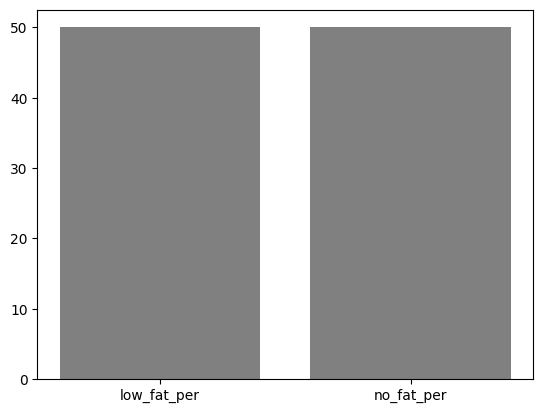

In [4]:
low_fat_per = (low_fat_count*100)/rows
no_fat_per = (no_fat_count*100)/rows
per = [low_fat_per, no_fat_per]
label = ['low_fat_per','no_fat_per']
plt.bar(label, per, color='grey')

### Scatter plot of pulse vs time

<Axes: xlabel='time', ylabel='pulse'>

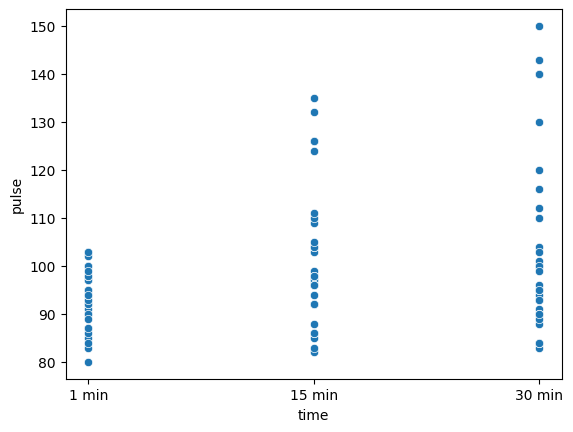

In [5]:
sns.scatterplot(data=exercise, x="time", y="pulse")

C:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


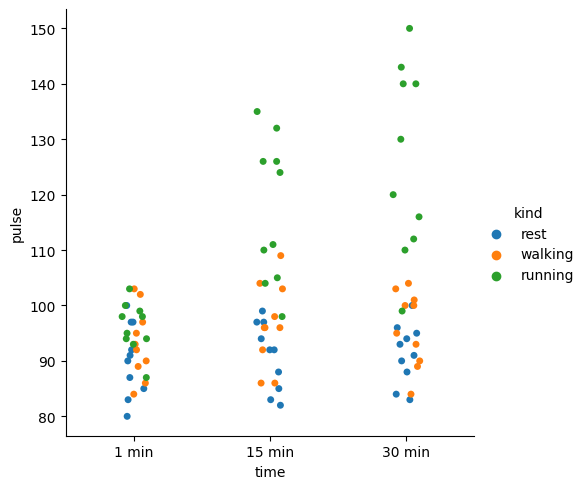

In [6]:
sns.catplot(x='time', y='pulse', hue='kind', data=exercise)

### Box plot using 'pulse' feature

<Axes: >

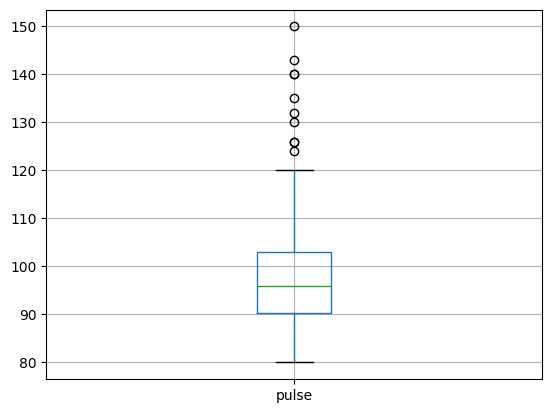

In [7]:
exercise.boxplot(column=['pulse'])
'''From the graph it is clear that the median is somewhere between 90 to 100. The pulse value above 120 are
considered as outlier. There are around 8 outliers'''

## 2. Iris dataset

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
iris = sns.load_dataset('iris')
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


### Making violin plot for each species of the sepal_length attribute

['setosa' 'versicolor' 'virginica']


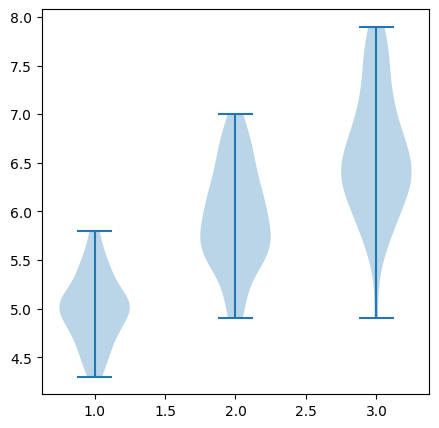

In [5]:
print(iris['species'].unique())
setosa = iris[iris['species'] == 'setosa']['sepal_length']
# print(setosa.head())
versicolor = iris[iris['species'] == 'versicolor']['sepal_length']
virginica = iris[iris['species'] == 'virginica']['sepal_length']

plt.figure(figsize=(5,5))
plt.violinplot([setosa, versicolor, virginica])
plt.show()

<Axes: xlabel='species', ylabel='sepal_length'>

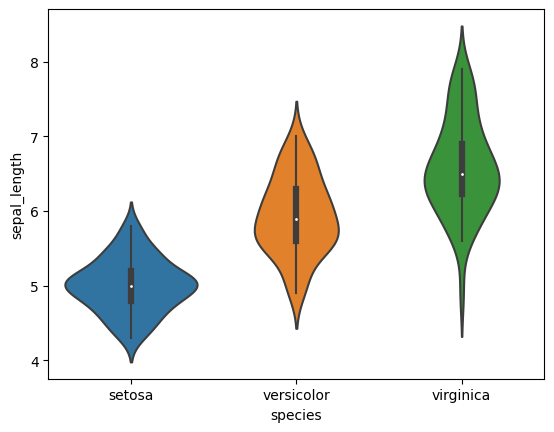

In [6]:
sns.violinplot(x='species',y='sepal_length',data=iris,size=6)

###  Making heat map using 'sepal_length', 'sepal_width', 'petal_length', 'petal_width' attributes

              sepal_length  sepal_width  petal_length  petal_width
sepal_length      1.000000    -0.117570      0.871754     0.817941
sepal_width      -0.117570     1.000000     -0.428440    -0.366126
petal_length      0.871754    -0.428440      1.000000     0.962865
petal_width       0.817941    -0.366126      0.962865     1.000000


<Axes: >

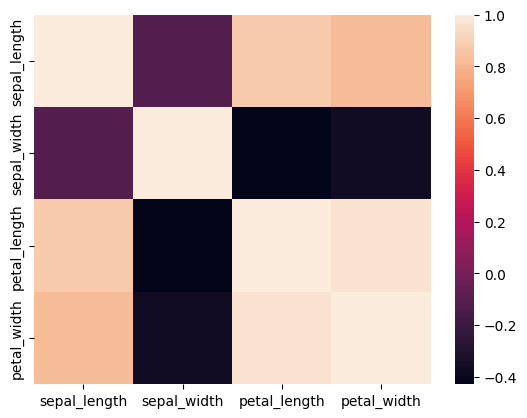

In [7]:
iris_2D = iris.corr(numeric_only=True)
# iris_2D.shape
print(iris_2D)

sns.heatmap(iris_2D)

### Making pairwise scatter of all features and then using PCA 

In [12]:
import plotly.express as px

df = px.data.iris()
features = ["sepal_width", "sepal_length", "petal_width", "petal_length"]

fig = px.scatter_matrix(df, dimensions=features, color="species")
fig.update_traces(diagonal_visible=False)
display(fig)

In [13]:
from sklearn.decomposition import PCA

df = px.data.iris()
features = ["sepal_width", "sepal_length", "petal_width", "petal_length"]

pca = PCA()
components = pca.fit_transform(df[features])
labels = {
    str(i): f"PC {i+1} ({var:.1f}%)"
    for i, var in enumerate(pca.explained_variance_ratio_ * 100)
}

fig = px.scatter_matrix(
    components,
    labels=labels,
    dimensions=range(4),
    color=df["species"]
)
fig.update_traces(diagonal_visible=False)
display(fig)

In [ ]:
'''The subplot between PC3 and PC4 is clearly unable to separate each class,
whereas the subplot between PC1 and PC2 shows a clear separation between each species.'''